In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import preprocessing module from sklearn
from sklearn import preprocessing

In [3]:
heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ethics_A2/heart.csv')
heart.head()

,Age,Sex,Race,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,Asian,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,Other,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,Other,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,White,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,Other,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#split dataset in features and target variable
feature_cols = heart.columns[:-1]
print(feature_cols)
X = heart[feature_cols] # features
y = heart.HeartDisease # target

Index(['Age', 'Sex', 'Race', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope'],
      dtype='object')


In [5]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=16)

In [6]:
# Create a LabelEncoder object
le = preprocessing.LabelEncoder()

# Fit the encoder to the categorical features and transform them
for column in X_train.columns:
    if X_train[column].dtype == type(object):  # Check if the column is categorical
        X_train[column] = le.fit_transform(X_train[column])
        X_test[column] = le.transform(X_test[column]) # Use the same encoder for the test set

In [7]:
#import the class
from sklearn.linear_model import LogisticRegression
#instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
#fit the model with data
logreg.fit(X_train,y_train)
#predict the response values
y_pred = logreg.predict(X_test)
#compute classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))

0.8434782608695652
0.8852459016393442
0.8307692307692308


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
pip install diffprivlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 3.2 MB/s eta 0:00:00


In [10]:
#create a differentially private logistic regression classifier
from diffprivlib.models import LogisticRegression
clf = LogisticRegression(epsilon=1.0)
#fit the model with data
clf.fit(X_train,y_train)
#predict the response values
y_pred = clf.predict(X_test)
#compute classification accuracy
from sklearn import metrics
print("Acc of differential privacy model is: %f" % metrics.accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
clf.score(X_test,y_test)

Acc of differential privacy model is: 0.473913
0.6557377049180327
0.5031446540880503


/usr/local/lib/python3.10/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


0.47391304347826085

# **Comparing accuracies between two classifiers**

The accuracy has decreased dramatically from 0.84 to 0.40 with differential privacy protection when epsilon equals to 1. It's inevitable to find poorer accuracy when we want to protect our data.

/usr/local/lib/python3.10/dist-packages/diffprivlib/utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'datanorm' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
/usr/local/lib/python3.10/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.10/dist-packages/diffprivlib/utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'datanorm' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' i

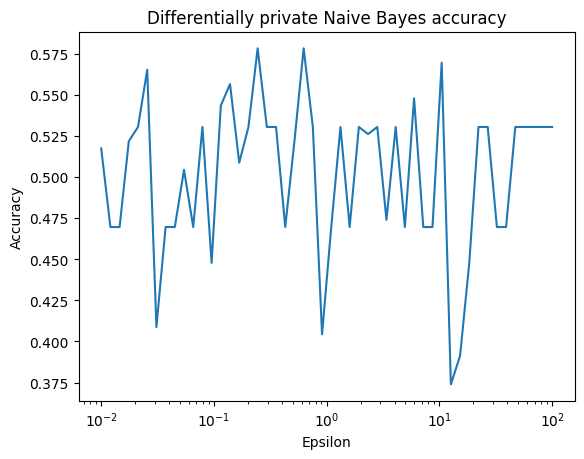

In [ ]:
#Calculate and illustrate how classification accuracy shifts with respect to different values of epsilon
epsilons = np.logspace(-2, 2, 50)
accuracy = list()
for epsilon in epsilons:
    clf = LogisticRegression(datanorm=12,epsilon=epsilon)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Differentially private Naive Bayes accuracy')
plt.show()